Based on SciKit-Learn Tutorial https://www.youtube.com/watch?v=0Lt9w-BxKFQ 

In [9]:
# Supervised Learning Survey 07/16/2021
# https://www.ibm.com/cloud/learn/supervised-learning
# https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/


import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import time
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn import svm

from sklearn.model_selection import cross_val_score # 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV    # 
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import ensemble

from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve # 
from sklearn.model_selection import ShuffleSplit




from timeit import default_timer as my_timer
%matplotlib inline

In [10]:
# from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [11]:
wine = pd.read_csv("datasets/winequality-red.csv", sep=',')

In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# based on ML Tutorial https://www.youtube.com/watch?v=0Lt9w-BxKFQ
# notes for dataset on Kaggle https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

bins=(2,6.5,8)
group_names=['bad', 'good']
wine['quality']=pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [16]:
label_quality =LabelEncoder()

In [17]:
# based on ML Tutorial https://www.youtube.com/watch?v=0Lt9w-BxKFQ
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [18]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [19]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/opt/anaconda3/envs/ml-env-py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

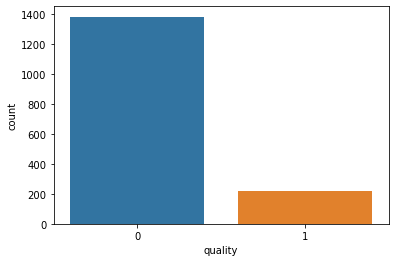

In [20]:
sns.countplot(wine['quality'], x="quality")

In [21]:
# separation of the datasets
X = wine.drop('quality', axis=1)
Y = wine['quality']

In [22]:
 #  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
 #
 test_train_size = 0.25
 X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_train_size, train_size=test_train_size, random_state = 1)
 X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(X, Y, test_size=test_train_size, train_size=test_train_size, random_state = 1)
 X_train_raw, X_test_raw, Y_train_raw, Y_test_raw = train_test_split(X, Y, test_size=test_train_size, train_size=test_train_size, random_state = 1)   

 print("X_train size=", X_train.shape)
 print("X_test size=", X_test.shape)   

X_train size= (399, 11)
X_test size= (400, 11)


In [23]:
# scaling using StandardScaler:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train[:5]

array([[-0.52550438, -1.25653631, -0.18271179, -0.16501458, -0.40911056,
         1.94334254,  0.85080508, -0.42792636,  0.75821917, -0.1877573 ,
        -0.31296262],
       [ 0.02138202,  0.8295172 , -0.03403333, -0.33075609, -0.06396407,
        -0.41961196, -0.04546668,  0.45422589, -0.01816094, -0.71865215,
        -1.12265194],
       [ 2.31830492, -0.90396389,  1.65098923,  0.08359769, -0.12148849,
         1.54951679,  0.91719559,  1.47998432, -1.37682612,  0.46111418,
         0.0468993 ],
       [ 0.24013659,  1.35837584, -0.23227128, -0.16501458, -0.44746017,
        -0.61652483, -0.07866193, -0.21251709, -1.37682612, -0.60067552,
        -0.94272098],
       [ 0.02138202,  1.82847241, -1.27302051, -0.24788533, -0.33241134,
        -1.01035058, -1.00812894, -0.00736541,  0.0465374 , -0.42371057,
         0.49672669]])

In [25]:
# scaling using RobustScaler
r_sc = RobustScaler()
X_train_r = r_sc.fit_transform(X_train_r)
X_test_r = r_sc.transform(X_test_r)

In [26]:
X_train_raw[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1144,7.3,0.320,0.23,2.3,0.066,35.0,70.0,0.99588,3.43,0.62,10.1
73,8.3,0.675,0.26,2.1,0.084,11.0,43.0,0.99760,3.31,0.53,9.2
446,12.5,0.380,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5
399,8.7,0.765,0.22,2.3,0.064,9.0,42.0,0.99630,3.10,0.55,9.4
647,8.3,0.845,0.01,2.2,0.070,5.0,14.0,0.99670,3.32,0.58,11.0


**Decision Tree Classifier**

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
clf.fit(X_train, Y_train)
predict_clf = clf.predict(X_test)

In [28]:
predict_clf[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [29]:
# performance
print("classification report\n", classification_report(Y_test, predict_clf))
print("confusion matrix\n", confusion_matrix(Y_test, predict_clf))
print("accuracy score=",accuracy_score(Y_test, predict_clf))

classification report
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       355
           1       0.43      0.44      0.43        45

    accuracy                           0.87       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.87      0.87      0.87       400

confusion matrix
 [[328  27]
 [ 25  20]]
accuracy score= 0.87


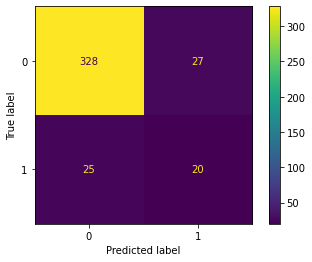

In [30]:
#plotting confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
plot_confusion_matrix(clf, X_test, Y_test)  

plt.savefig("images/CMatrix_DT_001.png")
plt.show()

In [31]:
# RobustClasifier Data
clf_r = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
clf_r.fit(X_train_r, Y_train_r)
predict_clf_r = clf_r.predict(X_test_r)

In [32]:
predict_clf_r[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [33]:
# robust scaler data
# performance
print("Wine Robust data classification report\n", classification_report(Y_test_r, predict_clf_r))
print("Wine Robust data confusion matrix\n", confusion_matrix(Y_test_r, predict_clf_r))
print("Wine Robust data accuracy score=",accuracy_score(Y_test_r, predict_clf_r))

Wine Robust data classification report
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       355
           1       0.43      0.44      0.43        45

    accuracy                           0.87       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.87      0.87      0.87       400

Wine Robust data confusion matrix
 [[328  27]
 [ 25  20]]
Wine Robust data accuracy score= 0.87


In [34]:
# raw data - unscaled 
clf_raw = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
clf_raw.fit(X_train_raw, Y_train_raw)
predict_clf_raw = clf_raw.predict(X_test_raw)

In [35]:
# raw data
# performance
print("Wine raw data classification report\n", classification_report(Y_test_raw, predict_clf_raw))
print("Wine raw data confusion matrix\n", confusion_matrix(Y_test_raw, predict_clf_raw))
print("Wine raw data accuracy score=",accuracy_score(Y_test_raw, predict_clf_raw))

Wine raw data classification report
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       355
           1       0.43      0.44      0.43        45

    accuracy                           0.87       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.87      0.87      0.87       400

Wine raw data confusion matrix
 [[328  27]
 [ 25  20]]
Wine raw data accuracy score= 0.87


**Hyper Parameter Tuning for Decision Tree**

In [36]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
# Use GridSearchCV
clf_dct_grds = GridSearchCV(DecisionTreeClassifier(criterion="entropy", random_state=1), {
                                                    'max_depth': [1,5,10,20],
                                                    'min_samples_leaf': [1,5,10,20,50]
                                                   }, cv=5, return_train_score=False)
clf_dct_grds.fit(X_train,Y_train)
clf_dct_grds.cv_results_


{'mean_fit_time': array([0.00128675, 0.00106068, 0.00119934, 0.00105329, 0.00107455,
        0.00188503, 0.0017426 , 0.0017777 , 0.00148435, 0.00129147,
        0.0022222 , 0.00192251, 0.00181656, 0.00145721, 0.00125551,
        0.00201221, 0.00184255, 0.00163684, 0.0014039 , 0.00118346]),
 'std_fit_time': array([3.43898615e-04, 2.63593925e-05, 1.25930391e-04, 3.39236714e-05,
        6.31039528e-05, 1.08494297e-04, 3.28294678e-05, 1.50895674e-04,
        1.00639688e-04, 9.93461811e-05, 2.80985277e-04, 7.39884112e-05,
        1.83145474e-04, 4.41956283e-05, 4.09908037e-05, 9.28860425e-05,
        4.11005971e-05, 6.49070838e-05, 1.89890183e-05, 4.44670528e-05]),
 'mean_score_time': array([0.00043168, 0.00037103, 0.00040789, 0.00038276, 0.00037093,
        0.00041533, 0.00039778, 0.00042477, 0.00037274, 0.00039048,
        0.00043855, 0.00043354, 0.00056815, 0.00038791, 0.00037618,
        0.0003809 , 0.00037546, 0.00037756, 0.0003695 , 0.00036831]),
 'std_score_time': array([4.17731123e-

In [37]:
df_dct = pd.DataFrame(clf_dct_grds.cv_results_)
df_dct

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001287,0.000344,0.000432,0.000042,1,1,"{'max_depth': 1, 'min_samples_leaf': 1}",0.8500,0.8500,0.8500,0.8500,0.848101,0.849620,0.000759,8
1,0.001061,0.000026,0.000371,0.000006,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.8500,0.8500,0.8500,0.8500,0.848101,0.849620,0.000759,8
2,0.001199,0.000126,0.000408,0.000024,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.8500,0.8500,0.8500,0.8500,0.848101,0.849620,0.000759,8
3,0.001053,0.000034,0.000383,0.000031,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.8500,0.8500,0.8500,0.8500,0.848101,0.849620,0.000759,8
4,0.001075,0.000063,0.000371,0.000004,1,50,"{'max_depth': 1, 'min_samples_leaf': 50}",0.8500,0.8500,0.8500,0.8500,0.848101,0.849620,0.000759,8
5,0.001885,0.000108,0.000415,0.000038,5,1,"{'max_depth': 5, 'min_samples_leaf': 1}",0.8750,0.8000,0.7875,0.8500,0.886076,0.839715,0.039507,16
6,0.001743,0.000033,0.000398,0.000036,5,5,"{'max_depth': 5, 'min_samples_leaf': 5}",0.8750,0.8000,0.8750,0.8750,0.860759,0.857152,0.029103,7
7,0.001778,0.000151,0.000425,0.000046,5,10,"{'max_depth': 5, 'min_samples_leaf': 10}",0.8750,0.8750,0.8250,0.8875,0.886076,0.869715,0.022975,1
8,0.001484,0.000101,0.000373,0.000002,5,20,"{'max_depth': 5, 'min_samples_leaf': 20}",0.8625,0.8250,0.8875,0.8625,0.860759,0.859652,0.019969,4
9,0.001291,0.000099,0.000390,0.000019,5,50,"{'max_depth': 5, 'min_samples_leaf': 50}",0.8375,0.7625,0.8750,0.8500,0.911392,0.847278,0.049335,13


In [38]:
clf_dct_grds.best_params_

{'max_depth': 5, 'min_samples_leaf': 10}

In [39]:
clf_dct_grds.best_score_

0.8697151898734179

**Improved Hyper Parameter Tuning for Decision Tree**

In [40]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
# Use GridSearchCV
clf_dct_grds = GridSearchCV(DecisionTreeClassifier(random_state=1), {
                                                    'criterion':('gini', 'entropy'),
                                                    'splitter': ('best', 'random'), 
                                                    'max_depth': [1,5,10,20],
                                                    'min_samples_leaf': [1,5,10,20,50],
                                                    'ccp_alpha': [0.0001,0.001,0.01,0.1]
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
#clf_dct_grds.fit(X_train,Y_train)
clf_dct_grds.fit(X,Y)
#clf_dct_grds.cv_results_
end_time = my_timer()
print("Decision Tree Grid Search Run time=", end_time-start_time)
print("Decision Tree Grid Search Results=", clf_dct_grds.cv_results_)


Decision Tree Grid Search Run time= 10.149964856100269
Decision Tree Grid Search Results= {'mean_fit_time': array([0.00379314, 0.00284109, 0.00329347, 0.00293837, 0.0036994 ,
       0.00272298, 0.00296044, 0.00243416, 0.0033051 , 0.00265474,
       0.0056335 , 0.00281115, 0.00515475, 0.00272884, 0.00507784,
       0.00283132, 0.00501423, 0.00269227, 0.00459433, 0.00329547,
       0.00674677, 0.00341153, 0.00703125, 0.00347023, 0.00644426,
       0.00328455, 0.00571809, 0.00321312, 0.00526175, 0.00344968,
       0.00757656, 0.00337601, 0.0063756 , 0.0030941 , 0.00620418,
       0.0030252 , 0.00544257, 0.00286183, 0.00502429, 0.0030179 ,
       0.00307302, 0.00269108, 0.00318775, 0.00259542, 0.00300202,
       0.00269117, 0.0030417 , 0.00284777, 0.00356202, 0.00274415,
       0.00554261, 0.00278006, 0.00554399, 0.00271101, 0.00558076,
       0.0027359 , 0.00555782, 0.00276189, 0.00501695, 0.00279722,
       0.00723848, 0.00313554, 0.00727687, 0.00348234, 0.00616555,
       0.00301847, 0.

In [41]:
df_dct = pd.DataFrame(clf_dct_grds.cv_results_)
df_dct

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003793,0.000715,0.001954,0.000055,0.0001,gini,1,1,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52
1,0.002841,0.000174,0.001863,0.000312,0.0001,gini,1,1,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52
2,0.003293,0.000084,0.001834,0.000063,0.0001,gini,1,5,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52
3,0.002938,0.000208,0.001838,0.000102,0.0001,gini,1,5,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52
4,0.003699,0.000597,0.002052,0.000189,0.0001,gini,1,10,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.003325,0.000103,0.001850,0.000034,0.1,entropy,20,10,random,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52
316,0.005713,0.000112,0.001758,0.000034,0.1,entropy,20,20,best,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52
317,0.002922,0.000034,0.001741,0.000017,0.1,entropy,20,20,random,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52
318,0.004752,0.000242,0.001732,0.000019,0.1,entropy,20,50,best,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.865625,0.865625,0.8625,0.8625,0.865204,0.864291,0.00147,52


In [42]:
clf_dct_grds.best_params_

{'ccp_alpha': 0.01,
 'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [43]:
clf_dct_grds.best_score_

0.8805544670846395

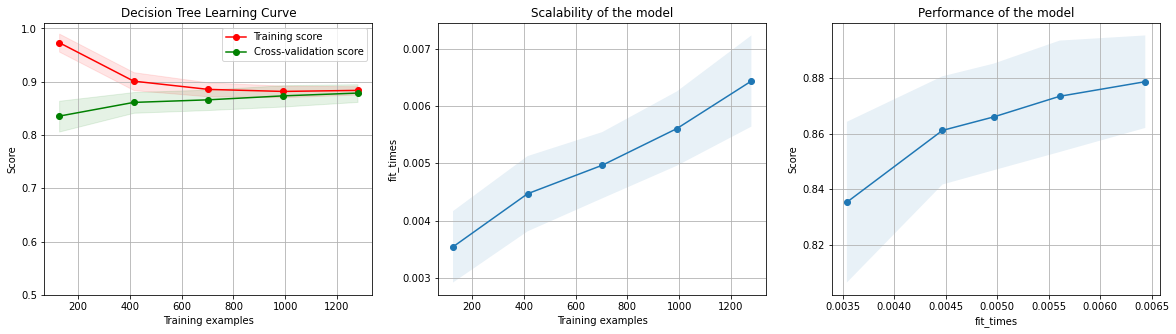

In [44]:
dct_best = clf_dct_grds.best_params_
dct_estimator = DecisionTreeClassifier(ccp_alpha=dct_best['ccp_alpha'],
                                       criterion=dct_best['criterion'],
                                       max_depth=dct_best['max_depth'],
                                       min_samples_leaf=dct_best['min_samples_leaf'],
                                       splitter=dct_best['splitter'])
dct_title = "Decision Tree Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(dct_estimator, dct_title, X, Y, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.savefig("images/dct_grds_best_wine.png")
plt.show()


**SVM Classifier**

In [45]:
svm_clf = svm.SVC()
svm_clf.fit(X_train, Y_train)
predict_svm = svm_clf.predict(X_test)

In [46]:
# performance
print("classification report\n", classification_report(Y_test, predict_svm))
print(" confusion matrix\n", confusion_matrix(Y_test, predict_svm))
print("accuracy score=",accuracy_score(Y_test, predict_svm))

classification report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       355
           1       0.65      0.24      0.35        45

    accuracy                           0.90       400
   macro avg       0.78      0.61      0.65       400
weighted avg       0.88      0.90      0.88       400

 confusion matrix
 [[349   6]
 [ 34  11]]
accuracy score= 0.9


**Hyper Parameter Tuning for SVM**

In [47]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/svm.html#svm
# Use GridSearchCV
clf_svm_grds = GridSearchCV(svm.SVC(gamma='auto'), {
                                                    'C': [1,10,20],
                                                    'kernel': ['rbf','linear'],
                                                    'gamma':[0.00001, 0.0001, 0.001] 
                                                   }, cv=5, return_train_score=False)
clf_svm_grds.fit(X_train,Y_train)
clf_svm_grds.cv_results_

{'mean_fit_time': array([0.00267863, 0.003303  , 0.00275464, 0.00340829, 0.00295758,
        0.00348864, 0.00280981, 0.01173925, 0.00358639, 0.00929346,
        0.00356297, 0.0101696 , 0.00294466, 0.01467161, 0.00288911,
        0.01371284, 0.00305543, 0.01439095]),
 'std_fit_time': array([3.57810069e-04, 7.82434135e-04, 6.74206936e-05, 7.44454164e-04,
        2.30968077e-04, 1.03982941e-03, 1.94782429e-04, 4.16403918e-03,
        4.36884169e-04, 2.80543751e-03, 3.88161099e-04, 3.95478678e-03,
        2.49731342e-04, 3.85337982e-03, 1.46936688e-04, 4.35713863e-03,
        1.61388254e-04, 4.72932758e-03]),
 'mean_score_time': array([0.00139842, 0.00074582, 0.00149503, 0.0007565 , 0.00175161,
        0.00078797, 0.00173459, 0.00120406, 0.00168157, 0.00080457,
        0.00176291, 0.00094357, 0.00151157, 0.00085006, 0.00139141,
        0.00073771, 0.00135279, 0.00084176]),
 'std_score_time': array([1.23178178e-04, 5.34037181e-05, 7.39352275e-05, 2.30825634e-05,
        3.26739572e-04, 1.33

In [48]:
df = pd.DataFrame(clf_svm_grds.cv_results_)

In [49]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002679,0.000358,0.001398,0.000123,1,1e-05,rbf,"{'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
1,0.003303,0.000782,0.000746,0.000053,1,1e-05,linear,"{'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}",0.85,0.8625,0.8500,0.85,0.848101,0.85212,0.005242,7
2,0.002755,0.000067,0.001495,0.000074,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
3,0.003408,0.000744,0.000757,0.000023,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.85,0.8625,0.8500,0.85,0.848101,0.85212,0.005242,7
4,0.002958,0.000231,0.001752,0.000327,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
5,0.003489,0.001040,0.000788,0.000134,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.85,0.8625,0.8500,0.85,0.848101,0.85212,0.005242,7
6,0.002810,0.000195,0.001735,0.000346,10,1e-05,rbf,"{'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
7,0.011739,0.004164,0.001204,0.000355,10,1e-05,linear,"{'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}",0.85,0.8625,0.8625,0.85,0.848101,0.85462,0.006471,1
8,0.003586,0.000437,0.001682,0.000253,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
9,0.009293,0.002805,0.000805,0.000107,10,0.0001,linear,"{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}",0.85,0.8625,0.8625,0.85,0.848101,0.85462,0.006471,1


In [50]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.84962
1,1,linear,0.85212
2,1,rbf,0.84962
3,1,linear,0.85212
4,1,rbf,0.84962
5,1,linear,0.85212
6,10,rbf,0.84962
7,10,linear,0.85462
8,10,rbf,0.84962
9,10,linear,0.85462


In [51]:
clf_svm_grds.best_params_

{'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}

In [52]:
clf_svm_grds.best_score_

0.8546202531645569

**Improved Hyper Parameter Tuning for SVM**

In [53]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/svm.html#svm
# Use GridSearchCV
clf_svm_grds = GridSearchCV(svm.SVC(random_state=1), {
                                                    'C': [1,10,20],
                                                    'kernel': ['rbf','linear', 'sigmoid'],
                                                    'gamma':[0.00001, 0.0001, 0.001]  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_svm_grds.fit(X_train,Y_train)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_svm_grds.cv_results_)


SVM Grid Search Run time= 0.8878343699034303
SVM Grid Search Results= {'mean_fit_time': array([0.00292401, 0.0036571 , 0.00245399, 0.00303426, 0.00389862,
       0.00319085, 0.00323572, 0.00343137, 0.00262218, 0.00276475,
       0.00925655, 0.00258822, 0.00304351, 0.00965343, 0.00264792,
       0.003298  , 0.00911627, 0.00274081, 0.00288472, 0.01384006,
       0.00247841, 0.00320568, 0.01442471, 0.00281801, 0.00348201,
       0.01433134, 0.00289268]), 'std_fit_time': array([2.31574502e-04, 7.32584497e-04, 9.99924678e-05, 3.41751557e-05,
       1.00137645e-03, 6.50340221e-04, 3.21292495e-04, 7.54049172e-04,
       8.24905406e-05, 5.66883780e-05, 2.56442753e-03, 1.03590653e-04,
       1.66467711e-04, 2.72990203e-03, 9.22467826e-05, 2.18786035e-04,
       2.66385207e-03, 1.67986990e-04, 8.06400013e-05, 4.54850705e-03,
       1.09780300e-05, 2.83518152e-04, 4.72964699e-03, 1.61320825e-04,
       3.68601434e-04, 4.54711750e-03, 2.49767030e-04]), 'mean_score_time': array([0.001372  , 0.00074

In [54]:
df_dct = pd.DataFrame(clf_svm_grds.cv_results_)
df_dct

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002924,0.000232,0.001372,0.000034,1,1e-05,rbf,"{'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
1,0.003657,0.000733,0.000749,0.000035,1,1e-05,linear,"{'C': 1, 'gamma': 1e-05, 'kernel': 'linear'}",0.85,0.8625,0.8500,0.85,0.848101,0.85212,0.005242,7
2,0.002454,0.000100,0.000778,0.000030,1,1e-05,sigmoid,"{'C': 1, 'gamma': 1e-05, 'kernel': 'sigmoid'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
3,0.003034,0.000034,0.001485,0.000047,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
4,0.003899,0.001001,0.000786,0.000119,1,0.0001,linear,"{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}",0.85,0.8625,0.8500,0.85,0.848101,0.85212,0.005242,7
5,0.003191,0.000650,0.000883,0.000136,1,0.0001,sigmoid,"{'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
6,0.003236,0.000321,0.001500,0.000096,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
7,0.003431,0.000754,0.000720,0.000067,1,0.001,linear,"{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}",0.85,0.8625,0.8500,0.85,0.848101,0.85212,0.005242,7
8,0.002622,0.000082,0.000728,0.000008,1,0.001,sigmoid,"{'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10
9,0.002765,0.000057,0.001352,0.000026,10,1e-05,rbf,"{'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}",0.85,0.8500,0.8500,0.85,0.848101,0.84962,0.000759,10


In [55]:
clf_svm_grds.best_params_

{'C': 10, 'gamma': 1e-05, 'kernel': 'linear'}

In [56]:
clf_svm_grds.best_score_

0.8546202531645569

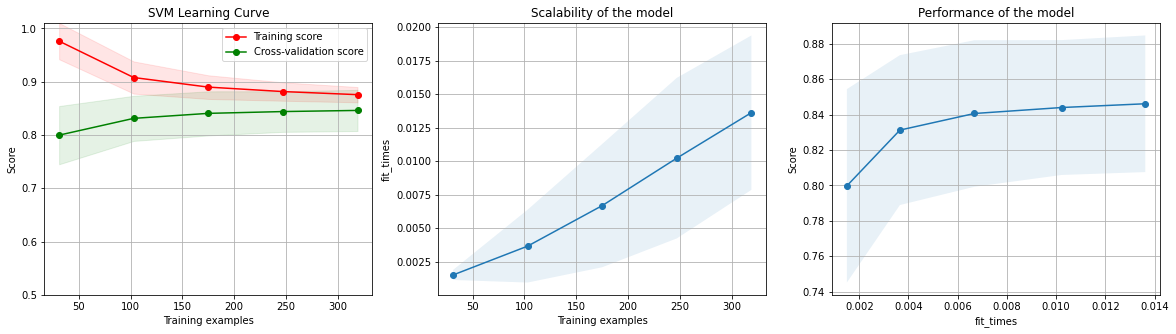

In [57]:
svm_best = clf_svm_grds.best_params_
svm_estimator = svm.SVC(C=svm_best['C'],
                        gamma=svm_best['gamma'],
                        kernel=svm_best['kernel'],
                        random_state=1)
svm_title = "SVM Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(svm_estimator, svm_title, X_train, Y_train, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/svm_grds_best_wine.png")
plt.show()

**Neural Networks**

In [58]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

mlp_clf = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=2000)
mlp_clf.fit(X_train, Y_train)
predict_mlp = mlp_clf.predict(X_test)

In [59]:
# performance
print("classification report\n", classification_report(Y_test, predict_mlp))
print("confusion matrix\n", confusion_matrix(Y_test, predict_mlp))
print("accuracy score=",accuracy_score(Y_test, predict_mlp))

classification report
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       355
           1       0.40      0.44      0.42        45

    accuracy                           0.86       400
   macro avg       0.66      0.68      0.67       400
weighted avg       0.87      0.86      0.87       400

confusion matrix
 [[325  30]
 [ 25  20]]
accuracy score= 0.8625


**Hyper Parameter Tuning for Neural Networks**

In [60]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier
# Use GridSearchCV
clf_nn_grds = GridSearchCV(MLPClassifier(hidden_layer_sizes=(11,11),max_iter=3000), {
                                                    'activation': ['relu', 'logistic'],
                                                    'alpha': [0.1,0.2,0.5, 1.0, 2.0, 3.0, 4.0]
                                                   }, cv=5, return_train_score=False)
clf_nn_grds.fit(X_train,Y_train)
clf_nn_grds.cv_results_

{'mean_fit_time': array([1.31846614, 1.13495121, 1.0057621 , 0.79238763, 0.54280119,
        0.46908007, 0.46767807, 0.63238859, 0.64359097, 0.45277534,
        0.21935487, 0.26392064, 0.22829757, 0.22167764]),
 'std_fit_time': array([0.16911658, 0.18265511, 0.38796611, 0.15356575, 0.05029542,
        0.05143156, 0.03023758, 0.14047215, 0.11813107, 0.14816524,
        0.04885632, 0.05147498, 0.05940697, 0.02715637]),
 'mean_score_time': array([0.00055199, 0.00053582, 0.00053768, 0.00059299, 0.00056443,
        0.00054493, 0.00060649, 0.00055223, 0.00054483, 0.00056996,
        0.00053959, 0.0005928 , 0.00054646, 0.0005444 ]),
 'std_score_time': array([1.51131053e-05, 4.41583134e-06, 7.07488805e-06, 1.09416455e-04,
        3.43801244e-05, 4.05339633e-06, 9.20843297e-05, 1.09749228e-05,
        2.92157625e-06, 5.46347190e-05, 2.66517422e-06, 7.54028073e-05,
        6.52936170e-06, 4.66375019e-06]),
 'param_activation': masked_array(data=['relu', 'relu', 'relu', 'relu', 'relu', 'relu', 'r

In [61]:
clf_nn_grds.best_params_

{'activation': 'relu', 'alpha': 0.2}

In [62]:
clf_nn_grds.best_score_

0.8747784810126582

**Improved Hyper Parameter Tuning for Neural Networks**

In [63]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier
# Use GridSearchCV
clf_nn_grds = GridSearchCV(MLPClassifier(random_state=0),{
                                                    'max_iter': [2000,2500],
                                                    'solver': ['sgd','adam'],
                                                    'alpha':[0.00001, 0.0001, 0.001],
                                                    'power_t': [0.4,0.5, 0.6],
                                                    'activation':['relu', 'tanh', 'logistic']  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_nn_grds.fit(X_train,Y_train)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_nn_grds.cv_results_)

SVM Grid Search Run time= 551.4597708280198
SVM Grid Search Results= {'mean_fit_time': array([0.61381698, 1.85754642, 0.60415525, 1.66890731, 0.63792195,
       1.73476982, 0.64332075, 1.77682076, 0.64471416, 1.74924855,
       0.63631701, 1.80014877, 0.67171497, 1.78743834, 0.69882517,
       1.75541601, 0.62592082, 1.74469194, 0.62602463, 1.71973886,
       0.63197737, 1.7056788 , 0.63018222, 1.7130311 , 0.62337322,
       1.74090891, 0.62797484, 1.80168581, 0.62985106, 1.81214795,
       0.64271679, 1.77804461, 0.65381861, 1.80799012, 0.6304235 ,
       1.78126545, 0.42343678, 2.64906492, 0.43663692, 2.62391992,
       0.44703565, 2.64888697, 0.42703319, 2.60894814, 0.42347693,
       2.84979706, 0.44773197, 2.71565228, 0.4801414 , 2.72984052,
       0.43615003, 2.70686746, 0.42751036, 2.7193965 , 0.62016759,
       2.71802969, 0.44709663, 2.72768917, 0.42644706, 2.69291587,
       0.45089679, 2.65538044, 0.42586641, 2.73643041, 0.42919502,
       2.62349606, 0.43662734, 2.68342972,

In [64]:
clf_nn_grds.best_params_

{'activation': 'tanh',
 'alpha': 1e-05,
 'max_iter': 2000,
 'power_t': 0.4,
 'solver': 'sgd'}

In [65]:
clf_nn_grds.best_score_

0.8521518987341772

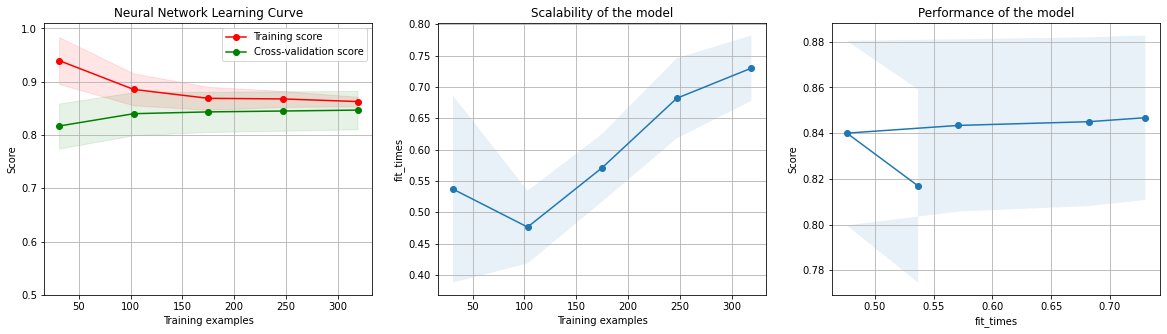

In [66]:
nn_best = clf_nn_grds.best_params_
nn_estimator = MLPClassifier(activation=nn_best['activation'],
                             alpha=nn_best['alpha'],
                             max_iter=nn_best['max_iter'],
                             power_t=nn_best['power_t'],
                             solver=nn_best['solver'],
                             random_state=1)
nn_title = "Neural Network Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(nn_estimator, nn_title, X_train, Y_train, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/nn_grds_best_wine.png")
plt.show()

**Boosting**

In [67]:
boos_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=600, learning_rate=1)
boos_clf.fit(X_train, Y_train)
predict_boos = boos_clf.predict(X_test)

In [68]:
# performance
print("classification report\n", classification_report(Y_test, predict_boos))
print("confusion matrix\n", confusion_matrix(Y_test, predict_boos))
print("accuracy score=",accuracy_score(Y_test, predict_boos))

classification report
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       355
           1       0.42      0.31      0.36        45

    accuracy                           0.88       400
   macro avg       0.67      0.63      0.64       400
weighted avg       0.86      0.88      0.87       400

confusion matrix
 [[336  19]
 [ 31  14]]
accuracy score= 0.875


**Hyper Parameter Tuning for Boosting**

In [69]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
# Use GridSearchCV
clf_boos_grds = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=1), {
                                                    'n_estimators': [10,50,100,200],
                                                    'learning_rate': [0.1,0.2,0.5, 1.0]
                                                   }, cv=5, return_train_score=False)
clf_boos_grds.fit(X_train,Y_train)
clf_boos_grds.cv_results_

{'mean_fit_time': array([0.01883903, 0.08551826, 0.16928468, 0.33640957, 0.01761031,
        0.08495536, 0.16806841, 0.34244852, 0.01811433, 0.08333979,
        0.16868005, 0.3395803 , 0.01799436, 0.08389888, 0.17342677,
        0.34449048]),
 'std_fit_time': array([0.00082849, 0.00387465, 0.00234092, 0.00401339, 0.00135957,
        0.00290137, 0.00375905, 0.00956062, 0.00126728, 0.00115284,
        0.00469101, 0.00911526, 0.00033864, 0.00178051, 0.00293879,
        0.00807435]),
 'mean_score_time': array([0.00217242, 0.00863018, 0.01672902, 0.03316231, 0.00204811,
        0.00845122, 0.01630936, 0.03223414, 0.00208359, 0.0084475 ,
        0.01646476, 0.03402548, 0.00215116, 0.00854769, 0.01800399,
        0.03387651]),
 'std_score_time': array([8.51136830e-05, 5.49593779e-04, 4.73515471e-04, 1.43824971e-03,
        1.53602268e-05, 2.49439666e-04, 1.42667781e-04, 7.33876575e-04,
        6.88879366e-05, 1.60546801e-04, 1.98240907e-04, 1.23075077e-03,
        5.29288386e-05, 2.04364952e-

In [70]:
df_boos = pd.DataFrame(clf_boos_grds.cv_results_)
df_boos

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018839,0.000828,0.002172,0.000085,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.8750,0.8375,0.8375,0.8625,0.873418,0.857184,0.016638,3
1,0.085518,0.003875,0.008630,0.000550,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.8500,0.8250,0.8375,0.8625,0.835443,0.842089,0.012934,13
2,0.169285,0.002341,0.016729,0.000474,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.8250,0.8250,0.8375,0.8625,0.886076,0.847215,0.023771,10
3,0.336410,0.004013,0.033162,0.001438,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.8250,0.8625,0.8375,0.8625,0.886076,0.854715,0.021373,6
4,0.017610,0.001360,0.002048,0.000015,0.2,10,"{'learning_rate': 0.2, 'n_estimators': 10}",0.8375,0.8625,0.8375,0.8875,0.860759,0.857152,0.018628,5
5,0.084955,0.002901,0.008451,0.000249,0.2,50,"{'learning_rate': 0.2, 'n_estimators': 50}",0.8750,0.8375,0.8000,0.8625,0.848101,0.844620,0.025676,12
6,0.168068,0.003759,0.016309,0.000143,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",0.9000,0.8375,0.8250,0.8625,0.835443,0.852089,0.026935,8
7,0.342449,0.009561,0.032234,0.000734,0.2,200,"{'learning_rate': 0.2, 'n_estimators': 200}",0.8875,0.8625,0.8250,0.8375,0.873418,0.857184,0.022953,3
8,0.018114,0.001267,0.002084,0.000069,0.5,10,"{'learning_rate': 0.5, 'n_estimators': 10}",0.8125,0.8375,0.8250,0.8875,0.886076,0.849715,0.031288,9
9,0.083340,0.001153,0.008448,0.000161,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.8250,0.7875,0.8250,0.8125,0.873418,0.824684,0.027951,16


In [71]:
clf_boos_grds.best_params_

{'learning_rate': 1.0, 'n_estimators': 200}

In [72]:
clf_boos_grds.best_score_

0.8697468354430379

**Improved Hyper Parameter Tuning for Boosting**

In [73]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
# Use GridSearchCV
clf_boos_grds = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=1), {
                                                    'n_estimators': [10,50,100,200,300,500, 1000],
                                                    'learning_rate': [0.1,0.2,0.5, 1.0, 1.2, 1.5, 2.0]
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_boos_grds.fit(X_train,Y_train)
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_boos_grds.cv_results_)

SVM Grid Search Run time= 139.70304952701554
SVM Grid Search Results= {'mean_fit_time': array([0.01836348, 0.08307548, 0.16609535, 0.33757205, 0.50812631,
       0.84355869, 1.6490016 , 0.01739058, 0.08220034, 0.16347299,
       0.33287277, 0.49572754, 0.82301445, 1.64711666, 0.01728139,
       0.08450279, 0.16709857, 0.33260803, 0.49383659, 0.823352  ,
       1.65326533, 0.01741233, 0.08202801, 0.16315928, 0.33281364,
       0.49343982, 0.84080796, 1.6572578 , 0.01686378, 0.08270192,
       0.16439719, 0.329388  , 0.49517174, 0.82667494, 1.65401697,
       0.01687589, 0.08241696, 0.17118258, 0.33478599, 0.49606619,
       0.82535052, 1.65218301, 0.01800261, 0.08215055, 0.16367893,
       0.3265121 , 0.49597268, 0.82614932, 1.69330039]), 'std_fit_time': array([7.00299291e-04, 1.24206548e-03, 2.46686838e-03, 8.67531548e-03,
       1.01266988e-02, 1.79221003e-02, 5.16399469e-03, 9.96313668e-04,
       5.55637215e-04, 1.10661224e-03, 4.01919019e-03, 2.17461421e-03,
       3.14759954e-03, 

In [74]:
clf_boos_grds.best_params_

{'learning_rate': 1.0, 'n_estimators': 1000}

In [75]:
clf_boos_grds.best_score_

0.882246835443038

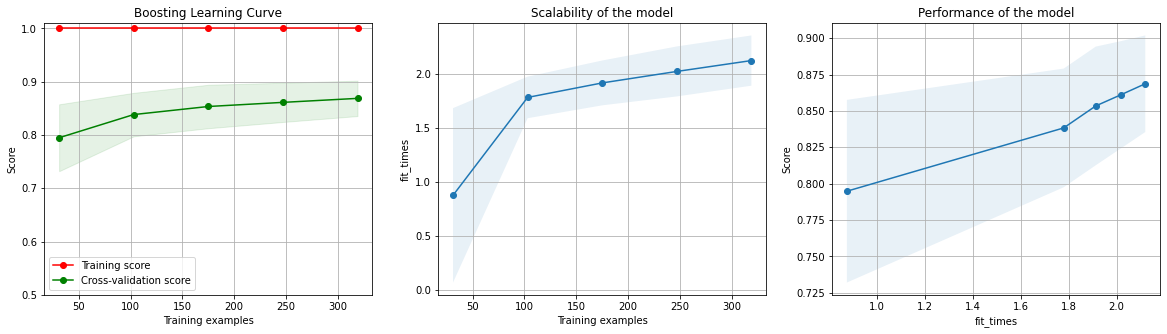

In [76]:
boos_best = clf_boos_grds.best_params_
boos_estimator = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                                   learning_rate=boos_best['learning_rate'], 
                                   n_estimators=boos_best['n_estimators'],
                                   random_state=1)
                
boos_title = "Boosting Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(boos_estimator, boos_title, X_train, Y_train, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/boost_grds_best_wine.png")
plt.show()

**K-Nearest Neighbors**

In [77]:
knn_clf = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto', p=2, leaf_size=30)
knn_clf.fit(X_train, Y_train)
predict_knn = knn_clf.predict(X_test)

In [78]:
# performance
print("classification report\n", classification_report(Y_test, predict_knn))
print("confusion matrix\n", confusion_matrix(Y_test, predict_knn))
print("accuracy score=",accuracy_score(Y_test, predict_knn))

classification report
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       355
           1       0.51      0.49      0.50        45

    accuracy                           0.89       400
   macro avg       0.72      0.71      0.72       400
weighted avg       0.89      0.89      0.89       400

confusion matrix
 [[334  21]
 [ 23  22]]
accuracy score= 0.89


**Hyper Parameter Tuning for KNN**

In [79]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier 
# Use GridSearchCV
clf_knn_grds = GridSearchCV(KNeighborsClassifier(weights='uniform', algorithm='auto'), {
                                                    'n_neighbors': [1,5,10],
                                                    'leaf_size': [10,20,30]
                                                   }, cv=5, return_train_score=False)
clf_knn_grds.fit(X_train,Y_train)
clf_knn_grds.cv_results_

{'mean_fit_time': array([0.00102725, 0.00086074, 0.00085998, 0.00086327, 0.00090885,
        0.00085239, 0.00089841, 0.00092897, 0.00085402]),
 'std_fit_time': array([2.00404486e-04, 2.66566046e-05, 1.16166379e-05, 5.45146883e-05,
        1.22429925e-04, 5.44616925e-05, 6.89121920e-05, 6.55755295e-05,
        4.00370038e-05]),
 'mean_score_time': array([0.00384421, 0.0039516 , 0.0041584 , 0.00370421, 0.00390997,
        0.00388541, 0.00365639, 0.0041163 , 0.00416069]),
 'std_score_time': array([1.48297843e-04, 3.01093121e-05, 1.32140567e-04, 2.46810913e-04,
        1.22286802e-04, 3.61141114e-05, 7.32875599e-05, 2.92919634e-04,
        6.45048018e-04]),
 'param_leaf_size': masked_array(data=[10, 10, 10, 20, 20, 20, 30, 30, 30],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': masked_array(data=[1, 5, 10, 1, 5, 10, 1, 5, 10],
              mask=[False, False, 

In [80]:
df_knn = pd.DataFrame(clf_knn_grds.cv_results_)
df_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001027,0.000200,0.003844,0.000148,10,1,"{'leaf_size': 10, 'n_neighbors': 1}",0.7625,0.7750,0.8250,0.7500,0.835443,0.789589,0.034265,7
1,0.000861,0.000027,0.003952,0.000030,10,5,"{'leaf_size': 10, 'n_neighbors': 5}",0.8125,0.8625,0.8625,0.8625,0.898734,0.859747,0.027477,1
2,0.000860,0.000012,0.004158,0.000132,10,10,"{'leaf_size': 10, 'n_neighbors': 10}",0.8500,0.8500,0.8250,0.8875,0.886076,0.859715,0.023920,4
3,0.000863,0.000055,0.003704,0.000247,20,1,"{'leaf_size': 20, 'n_neighbors': 1}",0.7625,0.7750,0.8250,0.7500,0.835443,0.789589,0.034265,7
4,0.000909,0.000122,0.003910,0.000122,20,5,"{'leaf_size': 20, 'n_neighbors': 5}",0.8125,0.8625,0.8625,0.8625,0.898734,0.859747,0.027477,1
5,0.000852,0.000054,0.003885,0.000036,20,10,"{'leaf_size': 20, 'n_neighbors': 10}",0.8500,0.8500,0.8250,0.8875,0.886076,0.859715,0.023920,4
6,0.000898,0.000069,0.003656,0.000073,30,1,"{'leaf_size': 30, 'n_neighbors': 1}",0.7625,0.7750,0.8250,0.7500,0.835443,0.789589,0.034265,7
7,0.000929,0.000066,0.004116,0.000293,30,5,"{'leaf_size': 30, 'n_neighbors': 5}",0.8125,0.8625,0.8625,0.8625,0.898734,0.859747,0.027477,1
8,0.000854,0.000040,0.004161,0.000645,30,10,"{'leaf_size': 30, 'n_neighbors': 10}",0.8500,0.8500,0.8250,0.8875,0.886076,0.859715,0.023920,4


In [81]:
clf_knn_grds.best_params_

{'leaf_size': 10, 'n_neighbors': 5}

In [82]:
clf_knn_grds.best_score_

0.8597468354430381

**Improved Hyper Parameter Tuning for KNN**

In [75]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier 
# Use GridSearchCV
clf_knn_grds = GridSearchCV(KNeighborsClassifier(), {
                                                    'n_neighbors': [1,5,7,10,20],
                                                    'weights':['uniform', 'distance'],
                                                    'leaf_size': [1,2,5,10,20,30,40],
                                                    'algorithm':['ball_tree','kd_tree','brute'] 
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_knn_grds.fit(X_train,Y_train)
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_knn_grds.cv_results_)

SVM Grid Search Run time= 4.269495134998579
SVM Grid Search Results= {'mean_fit_time': array([0.00186505, 0.0010951 , 0.00114565, 0.00145841, 0.00118184,
       0.00172443, 0.00116596, 0.00105391, 0.00115719, 0.00105586,
       0.00098143, 0.00100012, 0.00097947, 0.00099316, 0.0009594 ,
       0.00099859, 0.00095325, 0.00097227, 0.00097165, 0.00097103,
       0.00090103, 0.00090179, 0.00092478, 0.00091329, 0.00089903,
       0.00091853, 0.00094161, 0.00091143, 0.00090313, 0.00095458,
       0.00090017, 0.00090404, 0.00090241, 0.00089116, 0.00090365,
       0.00089078, 0.00089235, 0.00088034, 0.00088644, 0.00089517,
       0.00120263, 0.00100241, 0.00101881, 0.00090785, 0.00089064,
       0.00090747, 0.00090446, 0.00088902, 0.00086327, 0.00086226,
       0.00087028, 0.00087805, 0.00089402, 0.00091267, 0.00092144,
       0.00109396, 0.00095072, 0.00088639, 0.00085382, 0.00084944,
       0.00090637, 0.00112796, 0.00088668, 0.00087681, 0.00086112,
       0.00087662, 0.00085087, 0.00092621,

In [76]:
clf_knn_grds.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 5,
 'weights': 'distance'}

In [77]:
clf_knn_grds.best_score_

0.864746835443038

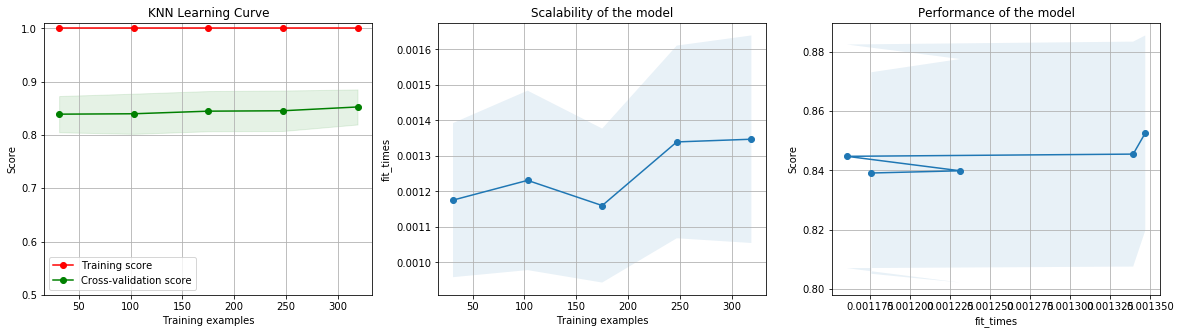

In [78]:
knn_best = clf_knn_grds.best_params_
knn_estimator = KNeighborsClassifier( n_neighbors=knn_best['n_neighbors'],
                                      weights=knn_best['weights'],
                                      leaf_size=knn_best['leaf_size'],
                                      algorithm=knn_best['algorithm']) 
                                
                
knn_title = "KNN Learning Curve"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(knn_estimator, knn_title, X_train, Y_train, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("images/knn_grds_best_wine.png")
plt.show()

**Breast Cancer Wisconsin Data**

In [5]:
b_cancer = pd.read_csv("datasets/breast_cancer_wisconsin_data.csv", sep=',')

In [6]:
b_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
b_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [83]:
b_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [106]:
b_cancer['diagnosis'].replace('B',0)

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     0
20     0
21     0
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    M
563    M
564    M
565    M
566    M
567    M
568    0
Name: diagnosis, Length: 569, dtype: object

In [84]:
b_cancer['diagnosis'].replace('M',1)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     B
20     B
21     B
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    1
563    1
564    1
565    1
566    1
567    1
568    B
Name: diagnosis, Length: 569, dtype: object

In [85]:
b_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

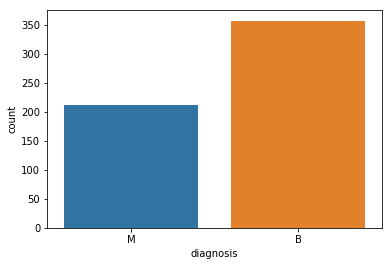

In [86]:
sns.countplot(b_cancer['diagnosis'])

In [87]:
# separation of the datasets
X_c = b_cancer.drop(['id','diagnosis','Unnamed: 32'], axis=1)
Y_c = b_cancer['diagnosis']
X_c.head()
Y_c.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [88]:
X_c.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [89]:
X_c.shape

(569, 30)

In [90]:
Y_c.replace(['M','B'],[1,0], inplace=True)

In [91]:
columns = X_c.columns.tolist()
columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [92]:
Y_c.head()


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

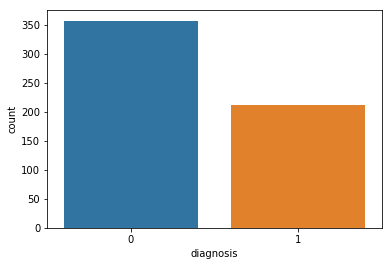

In [93]:
sns.countplot(Y_c)

In [94]:
Y_c.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [95]:
 #  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
 #
 test_train_size = 0.25
 X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=test_train_size, train_size=test_train_size, random_state = 1)
 X_train_c_raw, X_test_c_raw, Y_train_c_raw, Y_test_c_raw = train_test_split(X_c, Y_c, test_size=test_train_size, train_size=test_train_size, random_state = 1)   

In [96]:
# scaling using StandardScaler:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler
sc=StandardScaler()
X_train_c = sc.fit_transform(X_train_c)
X_test_c = sc.transform(X_test_c)

In [97]:
X_train_c[:5]


array([[ 3.69827026e-01,  3.18407859e+00,  5.41058600e-01,
         2.38744569e-01,  5.97455194e-01,  2.07282011e+00,
         2.23139731e+00,  1.30397912e+00,  1.24944608e+00,
         1.30502662e+00, -5.42244134e-01, -2.36376324e-02,
        -2.50413375e-01, -4.16501165e-01, -6.51810802e-01,
         1.29154897e+00,  1.62070492e+00,  6.59416242e-01,
         1.14858209e-01,  1.06651367e+00,  3.10943648e-01,
         3.21909537e+00,  7.07525469e-01,  1.03314250e-01,
         5.01784300e-01,  3.51872339e+00,  4.38737156e+00,
         1.89876614e+00,  2.14317847e+00,  3.49110135e+00],
       [ 2.92468490e-01,  1.75184427e-02,  2.64492194e-01,
         1.48450589e-01, -4.01681267e-01, -1.09037670e-01,
        -3.61572496e-01,  3.64949174e-02,  2.80823341e-01,
        -5.91781539e-01, -4.30273020e-01, -4.58453781e-01,
        -3.59329438e-01, -3.58038276e-01, -4.50833235e-01,
        -2.68873950e-01, -6.70411384e-01,  4.27830867e-03,
        -5.97590642e-01, -4.26440255e-01,  3.74509396e-

**Decision Tree Classifier Wisconsin Cancer Data**

In [98]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
clf_c = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
clf_c.fit(X_train_c, Y_train_c)
predict_clf_c = clf_c.predict(X_test_c)

In [99]:
predict_clf_c[:20]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [100]:
# performance
print("WI Cancer Classification Report\n", classification_report(Y_test_c, predict_clf_c))
print("WI Cancer Confusion Matrix\n", confusion_matrix(Y_test_c, predict_clf_c))
print("WI Cancer Accuracy Score=",accuracy_score(Y_test_c, predict_clf_c))

WI Cancer Classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        88
           1       0.90      0.82      0.86        55

    accuracy                           0.90       143
   macro avg       0.90      0.88      0.89       143
weighted avg       0.90      0.90      0.89       143

WI Cancer Confusion Matrix
 [[83  5]
 [10 45]]
WI Cancer Accuracy Score= 0.8951048951048951


In [101]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
clf_c_raw = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=0)
clf_c_raw.fit(X_train_c_raw, Y_train_c_raw)
predict_clf_c_raw = clf_c_raw.predict(X_test_c_raw)

In [102]:
X_train_c_raw[:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
562,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.094290,0.2128,0.07152,...,17.52,42.79,128.70,915.0,0.1417,0.79170,1.17000,0.23560,0.4089,0.14090
291,14.96,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.1313,0.30300,0.18040,0.14890,0.2962,0.08472
16,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.052590,0.1586,0.05922,...,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.29140,0.16090,0.3029,0.08216
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.02688,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007


In [103]:
# performance
print("WI Cancer raw data Classification Report\n", classification_report(Y_test_c_raw, predict_clf_c_raw))
print("WI Cancer raw data Confusion Matrix\n", confusion_matrix(Y_test_c_raw, predict_clf_c_raw))
print("WI Cancer raw data Accuracy Score=",accuracy_score(Y_test_c_raw, predict_clf_c_raw))

WI Cancer raw data Classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        88
           1       0.90      0.82      0.86        55

    accuracy                           0.90       143
   macro avg       0.90      0.88      0.89       143
weighted avg       0.90      0.90      0.89       143

WI Cancer raw data Confusion Matrix
 [[83  5]
 [10 45]]
WI Cancer raw data Accuracy Score= 0.8951048951048951


**Improved Hyper Parameter Tuning for Decision Tree - Wisconsin Cancer Data**

In [104]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier
# Use GridSearchCV
clf_dct_grds_c = GridSearchCV(DecisionTreeClassifier(random_state=0), {
                                                    'criterion':('gini', 'entropy'),
                                                    'splitter': ('best', 'random'), 
                                                    'max_depth': [1,2,5,7,10,20],
                                                    'min_samples_leaf': [1,5,10,20,50],
                                                    'ccp_alpha': [0.0001,0.001,0.01,0.1]
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_dct_grds_c.fit(X_train_c,Y_train_c)
#clf_dct_grds_c.fit(X,Y)
#clf_dct_grds.cv_results_
end_time = my_timer()
print("Decision Tree Grid Search Run time=", end_time-start_time)
print("Decision Tree Grid Search Results=", clf_dct_grds_c.cv_results_)

Decision Tree Grid Search Run time= 4.859988451004028
Decision Tree Grid Search Results= {'mean_fit_time': array([0.00149822, 0.0008831 , 0.00108857, 0.00084133, 0.00105658,
       0.00085559, 0.00108361, 0.00108156, 0.00106158, 0.00083456,
       0.00129485, 0.00098462, 0.00148067, 0.0009408 , 0.00129838,
       0.00089564, 0.00121179, 0.00099196, 0.00113025, 0.00078697,
       0.00144224, 0.00089912, 0.00126982, 0.00082884, 0.00125346,
       0.00085363, 0.00116787, 0.00079255, 0.00094695, 0.00077519,
       0.00142403, 0.00090337, 0.00130873, 0.00083404, 0.0012085 ,
       0.00086975, 0.00115275, 0.00080323, 0.00095553, 0.00080853,
       0.00140767, 0.00087323, 0.0012804 , 0.00084591, 0.00122008,
       0.00084338, 0.00115619, 0.00080676, 0.00094509, 0.00076499,
       0.00142746, 0.00087099, 0.00137091, 0.00090804, 0.00122466,
       0.00083065, 0.00116653, 0.00102105, 0.00126486, 0.00087953,
       0.00125918, 0.00083303, 0.00118203, 0.00081277, 0.00116167,
       0.00083847, 0.0

In [105]:
df_dct_c = pd.DataFrame(clf_dct_grds_c.cv_results_)
df_dct_c

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001498,0.000376,0.000575,0.000114,0.0001,gini,1,1,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.793103,0.827586,0.892857,0.785714,0.857143,0.831281,0.040020,279
1,0.000883,0.000088,0.000422,0.000018,0.0001,gini,1,1,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.724138,0.758621,0.642857,0.714286,0.678571,0.703695,0.039697,401
2,0.001089,0.000066,0.000463,0.000033,0.0001,gini,1,5,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.793103,0.827586,0.892857,0.785714,0.857143,0.831281,0.040020,279
3,0.000841,0.000019,0.000426,0.000017,0.0001,gini,1,5,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.724138,0.758621,0.642857,0.714286,0.678571,0.703695,0.039697,401
4,0.001057,0.000024,0.000449,0.000007,0.0001,gini,1,10,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.793103,0.827586,0.892857,0.785714,0.857143,0.831281,0.040020,279
5,0.000856,0.000037,0.000435,0.000027,0.0001,gini,1,10,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.724138,0.758621,0.642857,0.714286,0.678571,0.703695,0.039697,401
6,0.001084,0.000072,0.000449,0.000008,0.0001,gini,1,20,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.793103,0.827586,0.892857,0.785714,0.857143,0.831281,0.040020,279
7,0.001082,0.000140,0.000555,0.000081,0.0001,gini,1,20,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.655172,0.758621,0.642857,0.714286,0.678571,0.689901,0.042106,425
8,0.001062,0.000107,0.000477,0.000057,0.0001,gini,1,50,best,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.793103,0.862069,0.892857,0.821429,0.821429,0.838177,0.035081,231
9,0.000835,0.000028,0.000424,0.000016,0.0001,gini,1,50,random,"{'ccp_alpha': 0.0001, 'criterion': 'gini', 'ma...",0.655172,0.655172,0.642857,0.678571,0.678571,0.662069,0.014205,433


In [106]:
clf_dct_grds_c.best_params_

{'ccp_alpha': 0.0001,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'splitter': 'random'}

In [107]:
clf_dct_grds_c.best_score_

0.9642857142857142

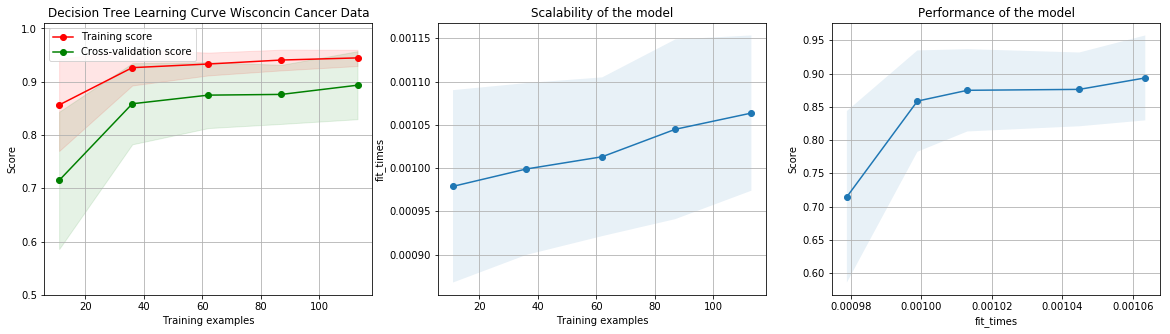

In [108]:
dct_best_c = clf_dct_grds_c.best_params_
dct_estimator_c = DecisionTreeClassifier(ccp_alpha=dct_best_c['ccp_alpha'],
                                       criterion=dct_best_c['criterion'],
                                       max_depth=dct_best_c['max_depth'],
                                       min_samples_leaf=dct_best_c['min_samples_leaf'],
                                       splitter=dct_best_c['splitter'])
dct_title_c = "Decision Tree Learning Curve Wisconcin Cancer Data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(dct_estimator_c, dct_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("dct_grds_best_cancer.png")
plt.show()

**SVM Classifier Wisconsin Cancer Data**

In [109]:
svm_clf_c = svm.SVC()
svm_clf_c.fit(X_train_c, Y_train_c)
predict_svm_c= svm_clf_c.predict(X_test_c)

In [110]:
# performance
print("SVM Cancer Data classification report\n", classification_report(Y_test_c, predict_svm_c))
print("SVM Cancer Data confusion matrix\n", confusion_matrix(Y_test_c, predict_svm_c))
print("SVM Cancer Data accuracy score=",accuracy_score(Y_test_c, predict_svm_c))

SVM Cancer Data classification report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.98      0.93      0.95        55

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

SVM Cancer Data confusion matrix
 [[87  1]
 [ 4 51]]
SVM Cancer Data accuracy score= 0.965034965034965


**Improved Hyper Parameter Tuning for SVM Wisconsin Cancer Data**

In [111]:
#Improved Hyper Parameter Tuning for SVM

# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/svm.html#svm
# Use GridSearchCV
clf_svm_grds_c = GridSearchCV(svm.SVC(random_state=1), {
                                                    'C': [1,10,20,50,100],
                                                    'kernel': ['rbf','linear', 'sigmoid'],
                                                    'gamma':[0.00001, 0.0001, 0.001]  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_svm_grds_c.fit(X_train_c,Y_train_c)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_svm_grds_c.cv_results_)


SVM Grid Search Run time= 0.5094444049755111
SVM Grid Search Results= {'mean_fit_time': array([0.00147166, 0.00109057, 0.00132174, 0.00147476, 0.00106869,
       0.00129185, 0.00131793, 0.0010745 , 0.00124483, 0.00227957,
       0.00135365, 0.00145555, 0.00134211, 0.00120077, 0.00122447,
       0.00111232, 0.00107784, 0.00112386, 0.00132136, 0.00109496,
       0.00135837, 0.00117579, 0.00106254, 0.00143299, 0.00106421,
       0.00105987, 0.00103054, 0.00135045, 0.001088  , 0.00126495,
       0.00116544, 0.00109253, 0.00110512, 0.00101624, 0.00105071,
       0.00104141, 0.00124321, 0.00105982, 0.00120668, 0.00107369,
       0.00105577, 0.0010632 , 0.00101137, 0.00106568, 0.00104079]), 'std_fit_time': array([1.41883263e-04, 4.98682309e-05, 4.66563656e-05, 5.74179262e-05,
       6.03592974e-05, 1.93807177e-05, 2.92621875e-05, 4.29128010e-05,
       2.41273948e-05, 4.19222999e-04, 1.82591190e-04, 8.26639539e-05,
       6.01114471e-05, 1.69154082e-04, 2.76135241e-05, 4.13834770e-05,
       

In [112]:
clf_svm_grds_c.best_params_

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

In [113]:
clf_svm_grds_c.best_score_

0.9645320197044336

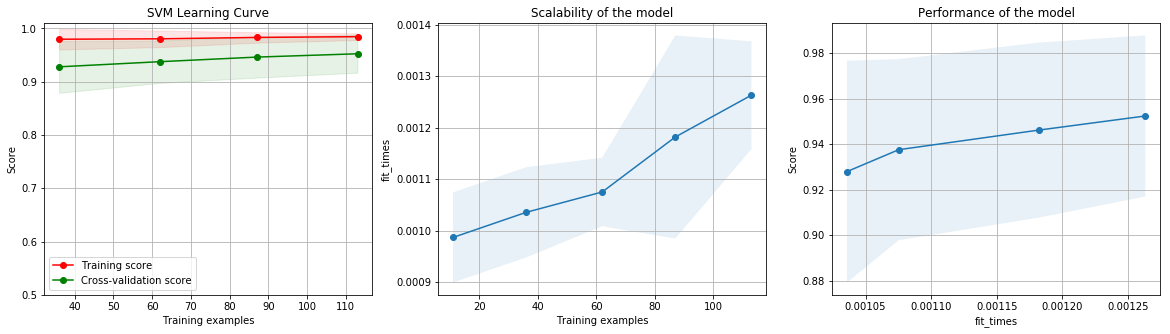

In [114]:
svm_best_c = clf_svm_grds_c.best_params_
svm_estimator_c = svm.SVC(C=svm_best_c['C'],
                        gamma=svm_best_c['gamma'],
                        kernel=svm_best_c['kernel'],
                        random_state=1)
svm_title_c = "SVM Learning Curve Wisconsin Cancer Data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(svm_estimator_c, svm_title, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("svm_grds_best_cancer.png")
plt.show()

**Wisconsin Cancer Data Neural Networks**

In [115]:
mlp_clf_c = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=2000)
mlp_clf_c.fit(X_train_c, Y_train_c)
predict_mlp_c= mlp_clf_c.predict(X_test_c)

In [116]:
# performance
print("Wisconsin Cancer Data Classification Report\n", classification_report(Y_test_c, predict_mlp_c))
print("Wisconsin Cancer Data Confusion Matrix\n", confusion_matrix(Y_test_c, predict_mlp_c))
print("Wisconsin Cancer Data Accuracy Score=",accuracy_score(Y_test_c, predict_mlp_c))

Wisconsin Cancer Data Classification Report
               precision    recall  f1-score   support

           0       0.97      0.98      0.97        88
           1       0.96      0.95      0.95        55

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Wisconsin Cancer Data Confusion Matrix
 [[86  2]
 [ 3 52]]
Wisconsin Cancer Data Accuracy Score= 0.965034965034965


**Improved Hyper Parameter Tuning for Neural Networks Wisconsin Cancer Data**

In [117]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier
# Use GridSearchCV
clf_nn_grds_c = GridSearchCV(MLPClassifier(random_state=0),{
                                                    'max_iter': [2000,2500],
                                                    'solver': ['sgd','adam'],
                                                    'alpha':[0.00001, 0.0001, 0.001],
                                                    'power_t': [0.4,0.5, 0.6],
                                                    'activation':['relu', 'tanh', 'logistic']  
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_nn_grds_c.fit(X_train_c,Y_train_c)
#clf_svm_grds.cv_results_
end_time = my_timer()
print("Neural Networks Grid Search Run time=", end_time-start_time)
print("Neural Networks Grid Search Results=", clf_nn_grds_c.cv_results_)

Neural Networks Grid Search Run time= 227.42611871100962
Neural Networks Grid Search Results= {'mean_fit_time': array([0.42115459, 0.22547889, 0.40317645, 0.2252274 , 0.42186418,
       0.23134699, 0.43075581, 0.24211631, 0.43379164, 0.2425302 ,
       0.43806052, 0.24177928, 0.43713655, 0.24304366, 0.46803398,
       0.24201751, 0.4730947 , 0.25520477, 0.44885354, 0.26934352,
       0.49345374, 0.24785995, 0.45452695, 0.25213203, 0.4416985 ,
       0.23968377, 0.46192708, 0.24564652, 0.45739613, 0.24822645,
       0.43928018, 0.24373994, 0.43734765, 0.24138651, 0.43938904,
       0.24012737, 0.3163362 , 0.23433723, 0.31848497, 0.23492136,
       0.31589613, 0.23108306, 0.31194186, 0.23356833, 0.31532974,
       0.22791095, 0.31463079, 0.23189468, 0.31092601, 0.22802706,
       0.30978441, 0.22595215, 0.31737986, 0.23427901, 0.33881598,
       0.24341793, 0.32561903, 0.23868251, 0.32275457, 0.23460875,
       0.32221818, 0.23609748, 0.31935792, 0.22829623, 0.30890846,
       0.22807717

In [118]:
clf_nn_grds_c.best_params_

{'activation': 'tanh',
 'alpha': 1e-05,
 'max_iter': 2000,
 'power_t': 0.4,
 'solver': 'sgd'}

In [119]:
clf_nn_grds_c.best_score_

0.9716748768472907

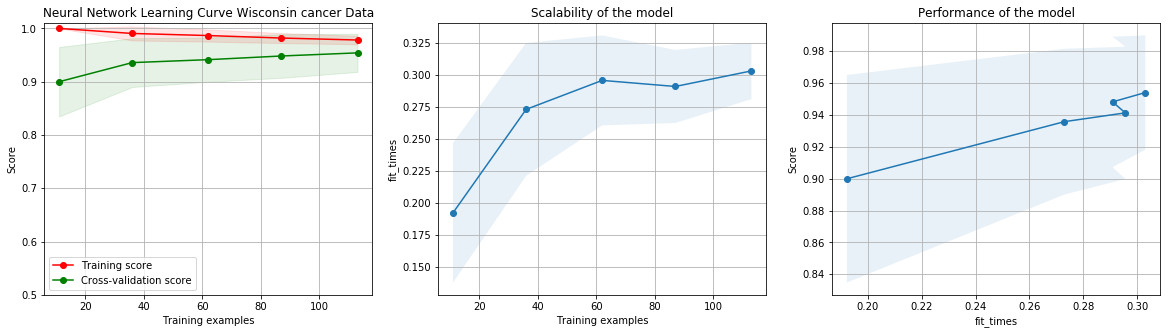

In [120]:
nn_best_c = clf_nn_grds.best_params_
nn_estimator_c = MLPClassifier(activation=nn_best_c['activation'],
                             alpha=nn_best_c['alpha'],
                             max_iter=nn_best_c['max_iter'],
                             power_t=nn_best_c['power_t'],
                             solver=nn_best_c['solver'],
                             random_state=1)
nn_title_c = "Neural Network Learning Curve Wisconsin cancer Data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(nn_estimator_c, nn_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("nn_grds_best_cancer.png")
plt.show()

**Wisconsin Cancer Data Boosting**

In [121]:
boos_clf_c=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=600, learning_rate=1)
boos_clf_c.fit(X_train_c, Y_train_c)
predict_boos_c = boos_clf_c.predict(X_test_c)

In [122]:
# performance
print("Wisconsin Cancer Data classification report\n", classification_report(Y_test_c, predict_boos_c))
print("Wisconsin Cancer Data confusion matrix\n", confusion_matrix(Y_test_c, predict_boos_c))
print("Wisconsin Cancer Data accuracy score=",accuracy_score(Y_test_c, predict_boos_c))

Wisconsin Cancer Data classification report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        88
           1       0.92      0.82      0.87        55

    accuracy                           0.90       143
   macro avg       0.91      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143

Wisconsin Cancer Data confusion matrix
 [[84  4]
 [10 45]]
Wisconsin Cancer Data accuracy score= 0.9020979020979021


**Improved Hyper Parameter Tuning for Boosting**

In [123]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
# Use GridSearchCV
clf_boos_grds_c = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), random_state=1), {
                                                    'n_estimators': [10,50,100,200,300,500, 1000],
                                                    'learning_rate': [0.1,0.2,0.5, 1.0, 1.2, 1.5, 2.0]
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_boos_grds_c.fit(X_train_c,Y_train_c)
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_boos_grds_c.cv_results_)

SVM Grid Search Run time= 110.98692615900654
SVM Grid Search Results= {'mean_fit_time': array([0.01592422, 0.07394352, 0.14985542, 0.29024444, 0.43136244,
       0.71469669, 1.43015819, 0.01536512, 0.07612195, 0.15314384,
       0.28767304, 0.43366585, 0.72869258, 1.40188537, 0.01488595,
       0.07306118, 0.14386067, 0.28633137, 0.42463207, 0.69730802,
       1.34256668, 0.0151288 , 0.07209239, 0.14574947, 0.28563809,
       0.4211308 , 0.68623147, 1.31526957, 0.01480231, 0.07297053,
       0.14487133, 0.28935356, 0.42563438, 0.68268771, 1.30345197,
       0.01527371, 0.07139626, 0.14352899, 0.27820177, 0.40275359,
       0.64359694, 1.23964753, 0.0146903 , 0.06772485, 0.13170023,
       0.2487164 , 0.37221823, 0.59350944, 1.13971992]), 'std_fit_time': array([0.00051591, 0.00191899, 0.00413239, 0.00416428, 0.00465409,
       0.00791948, 0.01625001, 0.00030327, 0.00312276, 0.01144387,
       0.00251021, 0.00608532, 0.02775692, 0.0204465 , 0.00017722,
       0.00170635, 0.00208292, 0.00

In [125]:
clf_boos_grds_c.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [126]:
clf_boos_grds_c.best_score_

0.9716748768472907

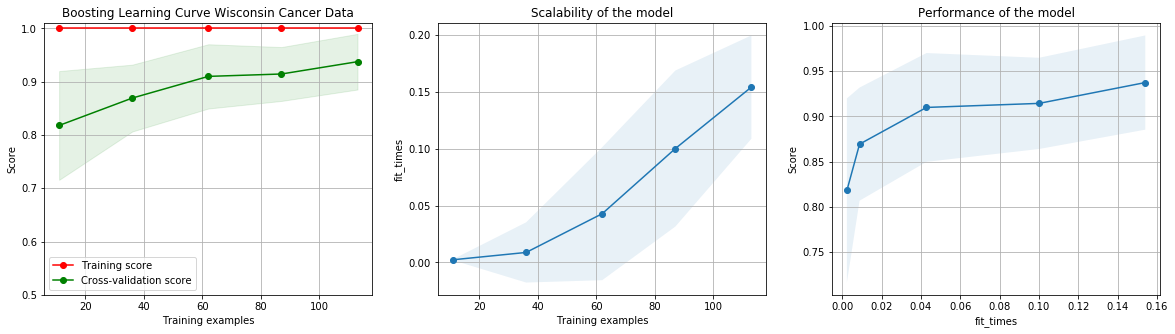

In [127]:
boos_best_c = clf_boos_grds_c.best_params_
boos_estimator_c = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), 
                                   learning_rate=boos_best_c['learning_rate'], 
                                   n_estimators=boos_best_c['n_estimators'],
                                   random_state=1)
                
boos_title_c = "Boosting Learning Curve Wisconsin Cancer Data"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(boos_estimator_c, boos_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("nn_grds_best_cancer.png")
plt.show()

**K-Nearest Neighbors**

In [128]:
knn_clf_c = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto', p=2, leaf_size=30)
knn_clf_c.fit(X_train_c, Y_train_c)
predict_knn_c = knn_clf_c.predict(X_test_c)

In [129]:
# performance
print("Wisconsin Cancer Data Classification Report\n", classification_report(Y_test_c, predict_knn_c))
print("Wisconsin Cancer Data Confusion Matrix\n", confusion_matrix(Y_test_c, predict_knn_c))
print("Wisconsin Cancer Data Accuracy Score=",accuracy_score(Y_test_c, predict_knn_c))

Wisconsin Cancer Data Classification Report
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        88
           1       1.00      0.87      0.93        55

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143

Wisconsin Cancer Data Confusion Matrix
 [[88  0]
 [ 7 48]]
Wisconsin Cancer Data Accuracy Score= 0.951048951048951


**Improved Hyper Parameter Tuning for KNN Wisconsin Cancer Data**

In [130]:
# Based on: ML Tutorial - Hyper Parameter Tuning 
# https://www.youtube.com/watch?v=HdlDYng8g9s
# https://github.com/codebasics/py/blob/master/ML/15_gridsearch/15_grid_search.ipynb
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid%20search#sklearn.model_selection.GridSearchCV
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier 
# Use GridSearchCV
clf_knn_grds_c = GridSearchCV(KNeighborsClassifier(), {
                                                    'n_neighbors': [1,5,7,10,20],
                                                    'weights':['uniform', 'distance'],
                                                    'leaf_size': [1,2,5,10,20,30,40],
                                                    'algorithm':['ball_tree','kd_tree','brute'] 
                                                   }, cv=5, return_train_score=False)
start_time = my_timer()
clf_knn_grds_c.fit(X_train_c,Y_train_c)
end_time = my_timer()
print("SVM Grid Search Run time=", end_time-start_time)
print("SVM Grid Search Results=", clf_knn_grds_c.cv_results_)


SVM Grid Search Run time= 2.7924777720472775
SVM Grid Search Results= {'mean_fit_time': array([0.00112247, 0.00094571, 0.00119224, 0.00094185, 0.0010076 ,
       0.00096684, 0.00095463, 0.00099316, 0.0012001 , 0.00105314,
       0.00100431, 0.00094509, 0.00089436, 0.00088148, 0.00088658,
       0.00090518, 0.00090084, 0.00085955, 0.0009068 , 0.00087762,
       0.00087705, 0.00086646, 0.00086818, 0.00088935, 0.00087914,
       0.00088673, 0.00085292, 0.00087304, 0.00086312, 0.0008873 ,
       0.00083103, 0.00088735, 0.00092988, 0.00087361, 0.00083661,
       0.000841  , 0.0008563 , 0.00086379, 0.00086694, 0.00084987,
       0.00080791, 0.00083146, 0.00100508, 0.00083394, 0.00107198,
       0.0008904 , 0.00091596, 0.00086985, 0.00088654, 0.00084438,
       0.00082588, 0.00082102, 0.0008204 , 0.00084105, 0.0011282 ,
       0.00083089, 0.00080252, 0.00081816, 0.00086222, 0.00082254,
       0.00082979, 0.00084758, 0.00091777, 0.000881  , 0.00123081,
       0.00086317, 0.00083942, 0.00082469

In [131]:
clf_knn_grds_c.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'n_neighbors': 5,
 'weights': 'uniform'}

In [132]:
clf_knn_grds_c.best_score_

0.9502463054187192

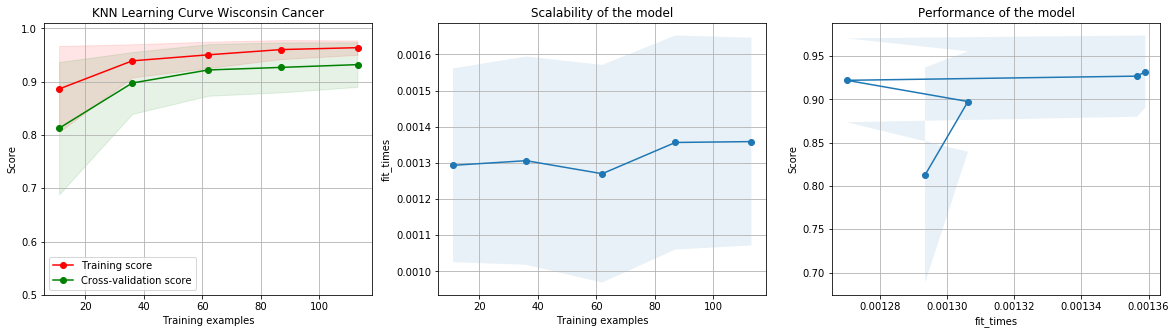

In [133]:
knn_best_c = clf_knn_grds_c.best_params_
knn_estimator_c = KNeighborsClassifier( n_neighbors=knn_best_c['n_neighbors'],
                                      weights=knn_best_c['weights'],
                                      leaf_size=knn_best_c['leaf_size'],
                                      algorithm=knn_best_c['algorithm']) 
                                
                
knn_title_c = "KNN Learning Curve Wisconsin Cancer"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=1)
plot_learning_curve(knn_estimator_c, knn_title_c, X_train_c, Y_train_c, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)
plt.savefig("knn_grds_best_cancer.png")
plt.show()